# **Lab 4**
### Weightage **4%**
# SVM
---
Datasets used: 



1.   Synthetic 2D Datasets
2.   COMPAS Recidivism Dataset



---

Maximum Points in the Lab: **75**

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **April 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [ ]:
# Import the necessary libraries
import sklearn
from sklearn.datasets import make_blobs,make_circles,make_moons
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lcmap
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd 
import os
import seaborn as sns

In [ ]:
# If COMPAS dataset is to be loaded from Google Drive, use this cell
# If running on local system, remove / comment this block

from google.colab import drive
drive.mount('/content/Mydrive', force_remount = True)


Mounted at /content/Mydrive


# SVM

---

In this lab you will be using one of the most powerful machine learning models namely Support Vector Machines (SVM) to classify the level of risk associated with granting bail to a person. But before diving into the analysis of this high dimensional real world dataset, we will be doing analyses on low dimensional synthetic datasets with 2 classes for a better understanding. 

# Synthetic Dataset


---

We will first take synthetic 2D datasets to help you visualize and understand how SVM works.

# Helpers

## Preparing for visualization


---

The following block guides you to color code data points in your plots and display the legend as per predicted and true labels. Insert the necessary information as asked in the comments.


---
**2 Points**

---




In [ ]:
# Insert different colors of your choice here
color_1 = 'blue'
color_2 = 'red'
color_3 = 'yellow'
color_4 = 'green'

# Insert different matplotlib markers of your choice here
train_set_marker = "."
test_set_marker = "o"

# This dictionary shall be used to color code the points and display legend in plots
colors_info = {color_1 : "class 0 and predicted as 0",
               color_2 : "class 0 and predicted as 1",
                color_3 : "class 1 and predicted as 0",
                color_4    : "class 1 and predicted as 1"}

c_vals = [0.01,0.1,1,10,100]

## Coloring the data points - Custom function

---

Color coding the data points as per their true and predicted labels in the visualization shall give an idea of the way the SVM model perceives the distribution of data points. The following function definition shall be reused to color code the different data points appropriately.


---
**3 Points**

---




In [ ]:
def get_color(pred_label,true_label):
    # Insert your code here to return corresponding color as per the predicted and true label
    if(pred_label==0):
      if(true_label==0):
        return color_1
      else:
        return color_3
    else:
      if(true_label==1):
        return color_4
      else:
        return color_2

## Customised scatter plot

---
We have different types of markers based on whether the data point was in the training set or test set. The following function definition is to create such customised scatter plots.


---
**2 Points**

---





In [ ]:
def plot_colored_scatter_plot(plot_x_axis,plot_y_axis,color_values,marker_type):
    # Insert your code here to generate a customized scatter plot as per given color and marker type
    plt.scatter(plot_x_axis,plot_y_axis,c=color_values,marker=marker_type)

## Plotting decision function

---
The following custom function is to plot the decision function learned by the SVM classifier. The decision boundary is to be plotted via bold line and the margins are to be plotted via dotted / dashed lines. The support vectors are to be encircled.


---
**10 Points**

---





In [ ]:
def plot_svc_decision_function(svm_model):

    # Insert your code here to get the complete legend ready
    decision = mpatches.Patch(linestyle='-',color='k', label='The Decision boundary')
    margin = mpatches.Patch(linestyle='--',color='k', label='Margin')
    
    # Insert your code here to create a grid to plot the data points
    ax=plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # Insert your code here to get the decision boundary function from the SVM model object (svm_model) 
    P = svm_model.decision_function(xy).reshape(X.shape)

    # Insert your code here to plot the decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

    # Insert your code here to encircle support vectors in the scatter plot
    ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

    # Insert your code here to show the plot along with the prepared legend.
    # For a cleaner view, it is recommended that you display the legend in a 2 x 2 grid
    plt.legend(handles=[decision,margin])
    plt.show()

# Working on the synthetic dataset with SVM classifier

---
Till now the functions you have defined shall be used as helper functions for this section. This is the place where you actually start training the SVM and apply it for classification. Follow the comments for step by step procedure.


---

**10 Points**

---




In [ ]:
def apply_svm_classifier(X,Y,kernel_type,regularization_constant = 1):
    # Insert your code here to split the dataset into train and test sets
    # Keep 20% of the data as the test set
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

    # Insert your code here to create a SVM classifier object with the given kernel and regularization settings
    clf=SVC(kernel=kernel_type,C=regularization_constant)

    # Insert your code here to train the SVM classifier on the train set 
    classifier=clf.fit(X_train,y_train)

    # Insert your code here to get the labels from the SVM classifier for train set
    y_train_pred=clf.predict(X_train)

    # Insert your code here to get the labels from the SVM classifier for test set
    y_test_pred=clf.predict(X_test)

    # Insert your code here to display the confusion matrix as per the SVM classifier's predictions on the train set
    confusion_matrix(y_train,y_train_pred,labels=[0,1])

    # Insert your code here to display the confusion matrix as per the SVM classifier's predictions on the test set
    confusion_matrix(y_test,y_test_pred,labels=[0,1])
    
    # Insert your code here to get color code values for data points as per their predicted and true labels
    label=[]
    for i in range(len(y_train)):
      if(y_train[i]==y_train_pred[i]):
        if(y_train[i]==1):
          label.append(color_4)
        else:
          label.append(color_1)
      else:
        if(y_train[i]==1):
          label.append(color_3)
        else:
          label.append(color_2)
    label1=[]
    for i in range(len(y_test)):
      if(y_test[i]==y_test_pred[i]):
        if(y_test[i]==1):
          label1.append(color_4)
        else:
          label1.append(color_1)
      else:
        if(y_test[i]==1):
          label1.append(color_3)
        else:
          label1.append(color_2)

    # Insert your code here to generate a colored scatter plot of the training data points
    xx=[]
    yy=[]
    for i in range(len(X_train)):
      xx.append(X_train[i][0])
      yy.append(X_train[i][1])
    plot_colored_scatter_plot(xx,yy,label,train_set_marker)
    

    # Insert your code here to generate a colored scatter plot of the test data points
    xx=[]
    yy=[]
    for i in range(len(X_test)):
      xx.append(X_test[i][0])
      yy.append(X_test[i][1])
    plot_colored_scatter_plot(xx,yy,label1,test_set_marker)

    # Insert your code here to initiate the function call to plot the decision function
    plot_svc_decision_function(clf)

# Creating Synthetic datasets

## Linearly separable dataset

---

First, let us create a linearly separable dataset with 2 classes. To facilitate this `make_blobs()` in `sklearn` package is provided. By suitabling adjusting the function parameters generate a linearly separable dataset and show a scatter plot of the generated data color coded as per true labels.


---

**2 Points**


---



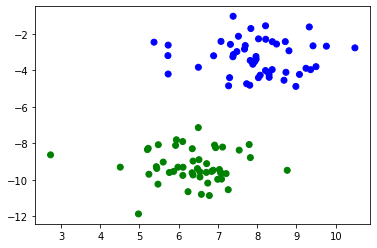

In [ ]:
# Insert your code here to generate perfectly linearly separable data points
X, y = make_blobs(centers=2, random_state=6)
xx=[]
yy=[]
for i in range(100):
  xx.append(X[i][0])
  yy.append(X[i][1])
# Insert your code to initiate the function call to generate colored scatter plot of the dataset
plt.scatter(xx,yy,c=y, cmap=lcmap(colors_info.keys()))

### Applying SVM

---

Apply SVM with linear kernel to classify the synthetic linearly separable dataset.

---
**1 Point**

---




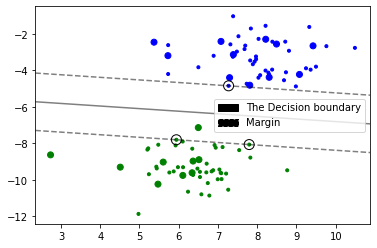

In [ ]:
# Insert your code here to apply a SVM classifier with Linear Kernel
apply_svm_classifier(X,y,'linear')

## Circular separable dataset

---

Now, let us create a circular separable dataset with 2 classes. To facilitate this `make_circles()` in `sklearn` package is provided. By suitabling adjusting the function parameters generate a circular separable dataset and show a scatter plot of the generated data color coded as per true labels.


---

**2 Points**


---



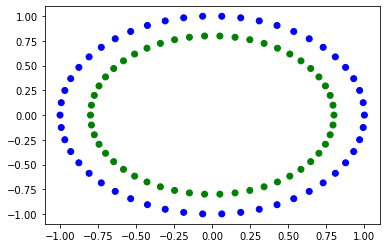

In [ ]:
# Insert your code here to generate perfectly circular separable data points
X, y = make_circles(random_state=6)
xx=[]
yy=[]
for i in range(100):
  xx.append(X[i][0])
  yy.append(X[i][1])

# Insert your code to initiate the function call to generate colored scatter plot of the dataset
plt.scatter(xx,yy,c=y, cmap=lcmap(colors_info.keys()))

### Applying SVM

---

Apply SVM with linear kernel to classify the synthetic circular separable dataset.

---
**1 Point**

---




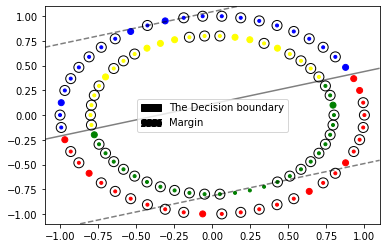

In [ ]:
# Insert your code here to apply a SVM classifier with Linear Kernel
apply_svm_classifier(X,y,'linear')

## RBF Kernel

---

As expected an SVM with linear kernel cannot model the true circular boundary well. To model circular boundary RBF kernel is to be applied. Apply SVM with RBF kernel to classify the synthetic circular separable dataset.

---
**1 Point**

---


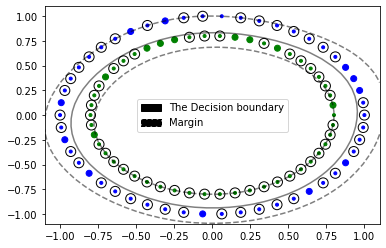

In [ ]:
# Insert your code here to apply a SVM classifier with RBF Kernel
apply_svm_classifier(X,y,'rbf')

## Inference from support vectors

---

**Comment** on what you infer from the support vectors.



---

 **2 Points**
 
---
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane.

For **linear**

The support vectors that are being chosen are such that the margin is high ,but as we can see from our previous run some of the data points do lie inside the margin. We can perhaps avoid this by adjusting the regularization constant. Although it should also be noted that all the points are correctly classified.

For **rbf**

Most of the datapoints are being the support vectors i.e close to the seperating hyperplane (due to our regularization constant) , but at the end the datapoints are correctly divided into their respective class labels.


## Experimenting with regularization constants

---
You have a parameter `C` in the SVM classifier of the `sklearn` package that helps adjust regularization weight. Experiment on various values for this parameter and **comment** your observations.


---

**2 Points**


---



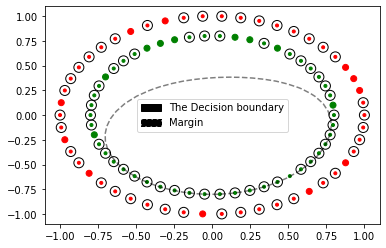

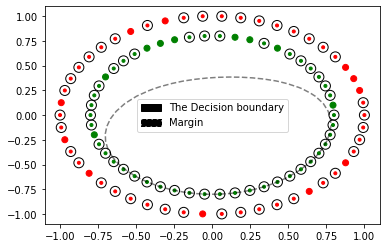

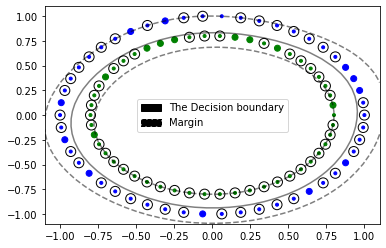

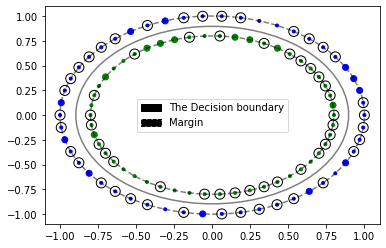

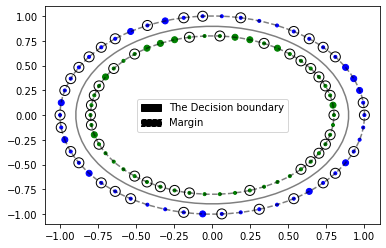

In [ ]:
for c in c_vals:
    # Insert your code here to experiment RBF kernel with different regularization constant values
    apply_svm_classifier(X,y,'rbf',c)

##Observations

We see that as the value of regularization constant increases. The margin as well as the number of support vectors to define the decision boundary decreases. This is because when we have low reguralization constant emphasis is more on having a high margin than correct classification. But when we increase the constant ,margin is given less importance and correct classification occurs, as we can see from the above observation.

As C increases more importance is given to classfication and misclassification is less likely to occur.

# COMPAS Recedivism dataset

Now that you have worked with synthetic 2D datasets and got yourself familiarised with SVM's, it's time to get your hands dirty working with a real world high dimensional dataset.

COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).




# Preprocessing the data

We have to load the data from CSV file. Except for **specifying the file path**, you need not have to do any changes to the block below.


---

**1 Point**

---



In [ ]:
# Specify the path of your COMPAS dataset CSV file as a string here
csv_path = '/compas-scores-raw.csv'

# Don't modify anything from here
# Load dataset
data_set = pd.read_csv(csv_path)

# Drop unimportant columns 
data_set.drop(["Person_ID", "AssessmentID","AssessmentReason","Case_ID","LastName","FirstName","MiddleName","DateOfBirth","Screening_Date","IsCompleted","IsDeleted","Language","RawScore","DecileScore","AssessmentType"], axis = 1, inplace = True) 
# Display the modified dataset
data_set 


,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet_ID,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,ScoreText
0,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,Low
1,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,Low
2,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,18,Risk of Failure to Appear,Low
3,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Low,7,Risk of Violence,Low
4,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Low,8,Risk of Recidivism,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,Probation,Male,African-American,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,8,Risk of Recidivism,High
60839,Probation,Male,African-American,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,18,Risk of Failure to Appear,High
60840,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,Low
60841,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,Medium


In [ ]:
# Preprocessing continued...
# Don't make any changes to this block
# Transforming the ScoreText into 0, 1, 2, 3
data_set['ScoreText'] = data_set['ScoreText'].map({'Low': 1, 'Medium': 2, 'High': 3})

df_s= pd.DataFrame(data_set.ScoreText)

for index in df_s.index:
     if df_s.iloc[index].ScoreText!=1:
        if df_s.iloc[index].ScoreText!=2:
          if df_s.iloc[index].ScoreText!=3:
            df_s.iloc[index].ScoreText=0

df = pd.DataFrame(data_set)

df.ScoreText=df_s.astype(int)

# Printing number of points corresponding to each class
print(len(df[df['ScoreText'] == 0]))
print(len(df[df['ScoreText'] == 1]))
print(len(df[df['ScoreText'] == 2]))
print(len(df[df['ScoreText'] == 3]))


45
41487
12488
6823


## Histograms Visualization

---


Plot a histogram between the race (Ethnic_Code_Text) and the mean score (ScoreText).


---

**1 Point**

---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46aec77d30>,
      dtype=object)

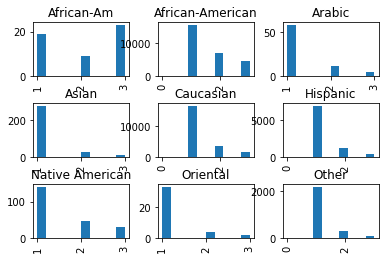

In [ ]:
# Insert your code here to plot a histogram by grouping race (Ethnic_Code_Text) and the mean score (ScoreText)
df.hist(column='ScoreText',by='Ethnic_Code_Text')

Plot a histogram between the legal status (LegalStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46aea185c0>,
      dtype=object)

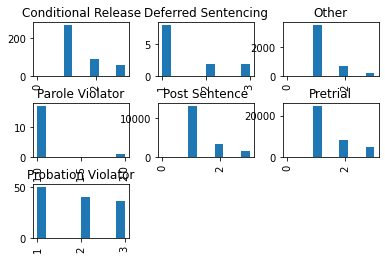

In [ ]:
# Insert your code here to plot a histogram by grouping legal status (LegalStatus) and the mean score (ScoreText)
df.hist(column='ScoreText',by='LegalStatus')

Plot a histogram between the display text (DisplayText) and the mean score (ScoreText).


---

**1 Point**

--- 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46abb23e80>,
      dtype=object)

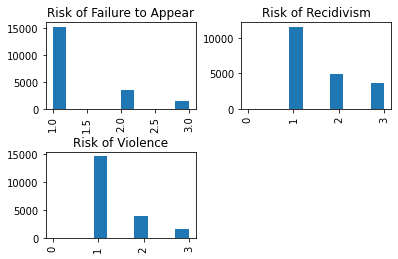

In [ ]:
# Insert your code here to plot a histogram by grouping display text (DisplayText) and the mean score (ScoreText)
df.hist(column='ScoreText',by='DisplayText')

Plot a histogram between the marital status (MaritalStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46aba1acf8>,
      dtype=object)

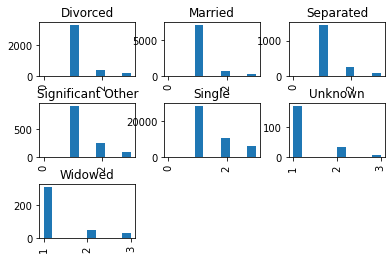

In [ ]:
# Insert your code here to plot a histogram by grouping marital status (MaritalStatus) and the mean score (ScoreText)
df.hist(column='ScoreText',by='MaritalStatus')

Plot a histogram between the recidivism supervision level (RecSupervisionLevelText) and the mean score (ScoreText).


---

**1 Point**

--- 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46ab7083c8>,
      dtype=object)

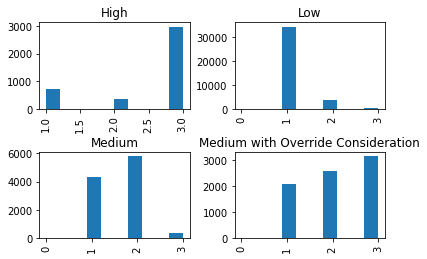

In [ ]:
# Insert your code here to plot a histogram by grouping recidivism supervision level (RecSupervisionLevelText) and the mean score (ScoreText)
df.hist(column='ScoreText',by='RecSupervisionLevelText')

Plot a histogram between the custody status (CustodyStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46ab53a8d0>,
      dtype=object)

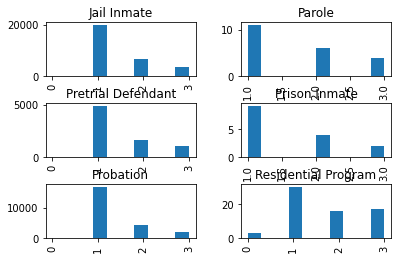

In [ ]:
# Insert your code here to plot a histogram by grouping custody status (CustodyStatus) and the mean score (ScoreText)
df.hist(column='ScoreText',by='CustodyStatus')

## Discretizing categorical attributes


---

As we have categorical attributes, we have to map them to a set of discrete values for processing by SVM. **Please don't make any changes to the block below.**



In [ ]:
# Transforming the Agency_Text into 0, 1, 2, 3
data_set['Agency_Text'] = data_set['Agency_Text'].map({'DRRD': 0, 'PRETRIAL': 1, 'Probation': 2, 'Broward County':3}).astype(int)
# Transforming the Gender into 0 and 1
data_set['Sex_Code_Text'] = data_set['Sex_Code_Text'].map({'Male': 0, 'Female': 1}).astype(int)
# Transforming the Ethnic_Code_Text into 0, 1, 2, 3, 4, 5, 6, 7,8
data_set['Ethnic_Code_Text'] = data_set['Ethnic_Code_Text'].map({'Caucasian': 0, 'African-American': 1, 'Hispanic': 2, 'Arabic':3, 'Asian':4,'Native American':5,'Oriental':6 , 'African-Am':7,'Other': 8}).astype(int)
# Transforming the LegalStatus into 0, 1, 2, 3, 4, 5,6 
data_set['LegalStatus'] = data_set['LegalStatus'].map({'Pretrial': 0, 'Post Sentence': 1, 'Conditional Release':2,'Deferred Sentencing':3,'Parole Violator':4,'Probation Violator':5,'Other': 6}).astype(int)
# Transforming the CustodyStatus into 0, 1, 2, 3, 4, 5
data_set['CustodyStatus'] = data_set['CustodyStatus'].map({'Jail Inmate': 0, 'Probation': 1, 'Pretrial Defendant': 2, 'Parole':3, 'Prison Inmate': 4, 'Residential Program':5}).astype(int)
# Transforming the marital status into 0, 1, 2, 3, 4, 5, 6
data_set['MaritalStatus'] = data_set['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2,'Separated':3,'Significant Other':4,'Unknown':5,'Widowed':6}).astype(int)

data_set




,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet_ID,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,ScoreText
0,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,7,Risk of Violence,1
1,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,8,Risk of Recidivism,1
2,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,18,Risk of Failure to Appear,1
3,1,0,0,22,Risk and Prescreen,0,0,1,1,Low,7,Risk of Violence,1
4,1,0,0,22,Risk and Prescreen,0,0,1,1,Low,8,Risk of Recidivism,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,2,0,1,22,Risk and Prescreen,0,0,0,3,Medium with Override Consideration,8,Risk of Recidivism,3
60839,2,0,1,22,Risk and Prescreen,0,0,0,3,Medium with Override Consideration,18,Risk of Failure to Appear,3
60840,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,7,Risk of Violence,1
60841,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,8,Risk of Recidivism,2


## Correlation matrix visualization


---

Plot a heatmap of the correlation matrix for all attributes. You may use the `seaborn` library.

---

**4 Points**

---



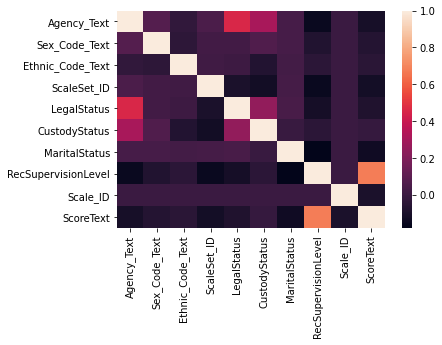

In [ ]:
# Insert your code here to plot the correlation matrix heatmap
corr=data_set.corr()
sns.heatmap(corr)

Consider only the attribute that has highest correlation with the target attribute `ScoreText`. Construct a reduced 1 dimensional dataset. Split it into train and test sets keeping 20% of the total data as the test set.

---

**3 Points**

---



In [ ]:
# Insert your code here to construct reduced 1D dataset
x=np.array(data_set['RecSupervisionLevel'])

# Insert your code here to consider target attribute Y which is ScoreText attribute
y=np.array(data_set['ScoreText'])

# Insert your code here to split the dataset into train and test sets.
# Keep 20% of the total data as test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


We have 4 classes in our target attribute. Such multi class classification via SVM can be considered as binary classification in One Vs. Rest (OR) One Vs. One fashion. Use “one-vs-the-rest” SVC for classification. Justify its effect on the score obtained.


---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate the One Vs Rest SVM classifier
clf=SVC(decision_function_shape='ovr')
x_train=X_train.reshape(-1,1)
# Insert your code here to fit the One Vs rest classifier on the training set
model=clf.fit(x_train,y_train)

# Insert your code here to print the number of support vectors for each class
print(model.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
x_test=X_test.reshape(-1,1)
model.score(x_test,y_test)


[  34 8612 8767 3293]


0.7565124496671871

##Justification

The score is decent. We have this score as when we are using one vs rest method, we have many datapoints on the other combined class label(rest). The model is then treating this as a binary classification problem and gets decision boundary with optimal margin and correct classification. This is then done for each class, and the combination of these decision boundaries is our effective classifier.

Repeat the same with One Vs One classification scheme. Justify its effect on the score obtained.

---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with linear kernel
clf=SVC(decision_function_shape='ovo',kernel='linear')

# Insert your code here to train the One Vs One classifier using the training set
model=clf.fit(x_train,y_train)

# Insert your code here to print the number of support vectors for each class
print(model.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
model.score(x_test,y_test)


[  34 9504 9974 3517]


0.7446791026378503

##Justification

The score is a little less than when we used one vs rest scheme. This is because when we ignore the rest of the classes (except 2 lets say A and B) and solve the binary classification problem to get our decision boundary. This decision boundary may not correctly classify class A and C for example. This would be due to neglegence of class C when forming that decision boundary between A and B.

Use “one-against-one” SVM classifier with RBF kernel for classification. Justify its effect on the score obtained.

---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with RBF kernel
clf=SVC(decision_function_shape='ovo',kernel='rbf')

# Insert your code here to train the One Vs One classifier with RBF kernel using the training set
model=clf.fit(x_train,y_train)

# Insert your code here to print the number of support vectors for each class
print(model.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
model.score(x_test,y_test)

[  34 8612 8767 3293]


0.7565124496671871

##Justification

The score is higher than when we simply used linear function to classify the data points. Here when we use a kernel to transform the data points to a higher dimensional space. The data points with their different class labels are more accurately classified by a linear hyperplane. Even when we neglect other classes (except 2), the number of misclassified points are less.

Lets take some more features in decreasing order of correlation with ScoreText and check its effect on the score. Take top-7 correlated attributes and divide the data in 80:20 (train:test) fashion as done above.

---

**3 Points**

---





In [ ]:
# Insert your code here to construct the reduced dataset by taking top 7 most correlated attributes with the target attribute (ScoreText)
rows=len(data_set['Agency_Text'])
cols=7
x=[[0]*cols]*rows
for i in range(len(data_set['Agency_Text'])):
    x[i][0]=data_set['RecSupervisionLevel'][i]
    x[i][1]=data_set['CustodyStatus'][i]
    x[i][2]=data_set['Ethnic_Code_Text'][i]
    x[i][3]=data_set['Sex_Code_Text'][i]
    x[i][4]=data_set['LegalStatus'][i]
    x[i][5]=data_set['Scale_ID'][i]
    x[i][6]=data_set['Agency_Text'][i]

# Insert your code here to consider target attribute Y which is ScoreText attribute
y=np.array(data_set['ScoreText'])

# Insert your code here to split the dataset into train and test sets.
# Keep 20% of the total data as test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Use SVM One Vs One classifier with linear kernel for classification and justify the increase or decrease in the score and number of support vectors.


---

**4 Points**

---





In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with linear kernel
clf=SVC(decision_function_shape='ovo',kernel='linear')

# Insert your code here to train the One Vs One classifier using the training set
model=clf.fit(X_train,y_train)

# Insert your code here to print the number of support vectors for each class
print(model.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
model.score(X_test,y_test)

[  34 9974 9974 5469]


0.6812392143972389

##Justification

There is an increase in the **number of support vectors**. But this is to be expected as the dimension of our input vectors has increased from 1 to 7. Our classifier is now working on a higher dimensional space so it need to perform more computation. There are more attributes to consider for each instance/vector - That is why there is an increase in the number of support vectors to shape the decision boundary.

The **score** has gone low, this is due to giving more weight to the other attributes which have a weak correlation with the attribute 'ScoreText'. It was better to just ignore these attributes.



Repeat the same with RBF kernel and justify the increase or decrease in the score and number of support vectors.

---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with RBF kernel
clf=SVC(decision_function_shape='ovo',kernel='rbf')

# Insert your code here to train the One Vs One classifier with RBF kernel using the training set
model=clf1.fit(X_train,y_train)

# Insert your code here to print the number of support vectors for each class
print(model.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
model.score(X_test,y_test)

[  34 9974 9974 5469]


0.6812392143972389

##Justification

There is an increase in the **number of support vectors**. But this is to be expected as the dimension of our input vectors has increased from 1 to 7. Our classifier is now working on a higher dimensional space so it need to perform more computation. There are more attributes to consider for each instance/vector - That is why there is an increase in the number of support vectors.

The **score** has gone low, this is due to giving more weight to the other attributes which have a weak correlation with the attribute 'ScoreText'. It was better to just ignore these attributes.

In this run regardless of the kernel transformation used, both score and number of support vectors are same with that of the linear kernel. The kernel is of less importance.